In [19]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [20]:
# 辅助函数定义
def returns(series):
    return series.pct_change()

def ts_sum(df, window=10):
    return df.rolling(window).sum()

def sma(df, window=10):
    return df.rolling(window).mean()

def stddev(df, window=10):
    return df.rolling(window).std()

def correlation(x, y, window=10):
    return x.rolling(window).corr(y).fillna(0).replace([np.inf, -np.inf], 0)

def ts_rank(df, window=10):
    return df.rolling(window).apply(lambda x: rankdata(x)[-1]/window, raw=True)

def delta(df, period=1):
    return df.diff(period)

def rank(df):
    # 时间序列rank替代截面rank
    return df.rolling(252).rank(pct=True)

def ts_argmax(df, window=10):
    return df.rolling(window).apply(lambda x: x.argmax() + 1, raw=True)

In [21]:
ds=DataService()

In [22]:
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]
df.head()

,open,high,low,close,volume,close_time,turnover,trade_count,taker_buy_volume,taker_buy_turnover
open_time,,,,,,,,,,
2021-10-01 00:00:00,2999.4500,3026.2600,2995.8800,3011.4800,37953.6870,1633047299999,114253757.6028,42570,20397.6590,61398762.8713
2021-10-01 00:15:00,3011.4800,3023.9100,3005.6000,3022.9500,13523.6090,1633048199999,40776341.6975,21048,7160.3910,21598325.2193
2021-10-01 00:30:00,3022.9500,3040.5400,3020.5500,3029.3700,28750.4770,1633049099999,87119698.8131,39255,15659.2770,47461464.3194
2021-10-01 00:45:00,3029.1100,3029.6800,3014.8000,3017.9200,15488.0490,1633049999999,46764677.9905,23806,5829.6980,17604913.6813
2021-10-01 01:00:00,3017.9100,3023.3900,2996.0000,3000.9900,25731.2940,1633050899999,77375000.6151,34185,10056.8140,30250664.9399


In [23]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [24]:
def alpha001(df):
    close = df['close']
    returns = df['close'].pct_change()
    inner = close.copy()
    inner[returns < 0] = stddev(returns, 20)
    return rank(ts_argmax(inner ** 2, 5)) - 0.5

In [25]:
evaluator.set_factor(
    factor_data_or_func=alpha001,
    factor_name='alpha001'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): -0.000302
   Rank_IC (Spearman): -0.020349
📊 信息比率:
   IR: -0.018845
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 129993
   因子列: alpha001
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


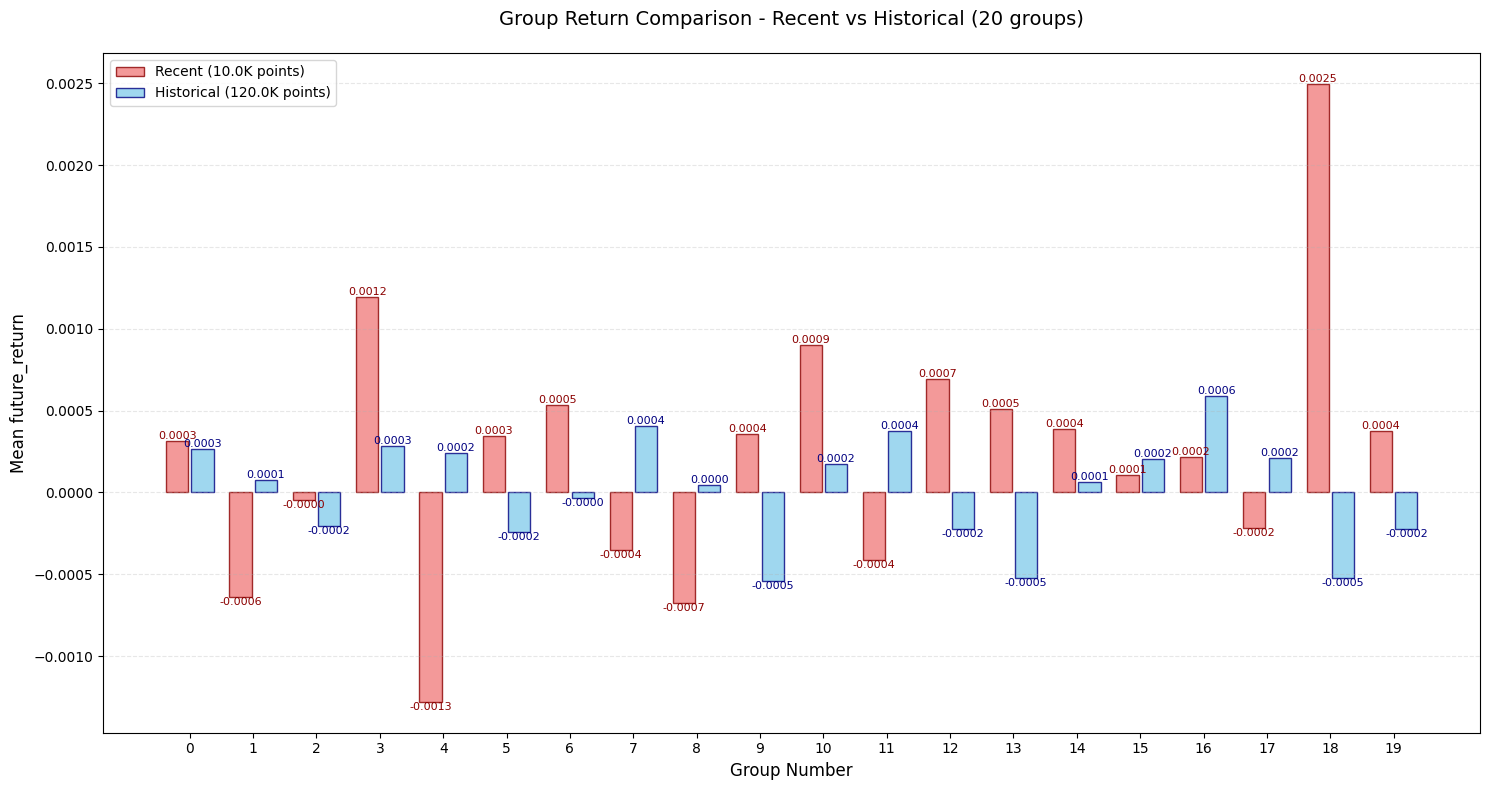

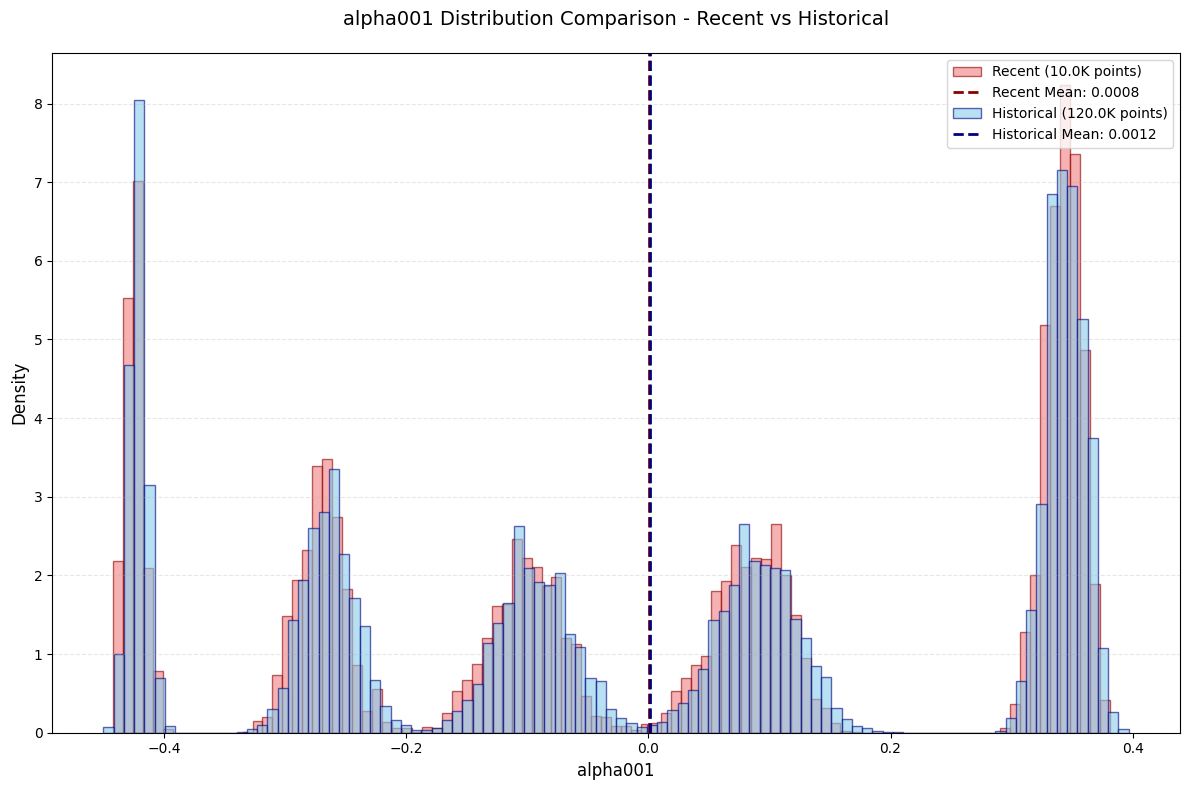

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [26]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)